## Visualization of input datasets

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio

from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Import ELMs

# Marin
with rasterio.open('/home/minho/fires/LDARCH289/data_label/marin_elm.tif', 'r') as src:
    marin_elm = src.read(1)
marin_elm[marin_elm<1] = np.nan

# San Mateo
with rasterio.open('/home/minho/fires/LDARCH289/data_label/sanmateo_elm.tif', 'r') as src:
    sanmateo_elm = src.read(1)
sanmateo_elm[sanmateo_elm<1] = np.nan

In [3]:
# Set dictionary of ELM classes and colors
colors = {
    'Agriculture': (255, 128, 0),
    'Water': (51, 153, 255),
    'Aquatic Vegetation': (0,255,255),
    'Bare Soil': (153, 76, 0),
    'Urban': (255, 51, 51),
    'Forest Fragment': (40, 200, 130),
    'Wetlands': (102, 0, 204),
    'Herbaceous': (255, 153, 204),
    'Fields': (255, 255, 153),
    'Tree': (0, 102, 52),
    'Shrubs': (0, 180, 30),
    'Nonnative Forest': (204, 255, 204),
    'Nonnative Herbaceous': (0, 0, 0),
    'Short Vegetation': (128, 255, 0)}

color_values = list(colors.values())
rgb_colors = [(r / 255, g / 255, b / 255) for r, g, b in color_values]
cmap = ListedColormap(rgb_colors)
labels = list(colors.keys())

In [4]:
# Set label names for colorbar labels
_labels = ['Agriculture',
        'Water',
        'Aquatic\nVegetation',
        'Bare Soil',
        'Urban',
        'Forest\nFragment',
        'Wetlands',
        'Herbaceous',
        'Fields',
        'Tree',
        'Shrubs',
        'Nonnative\nForest',
        'Nonnative\nHerbaceous',
        'Short\nVegetation']

#### Figure 1. Study Area

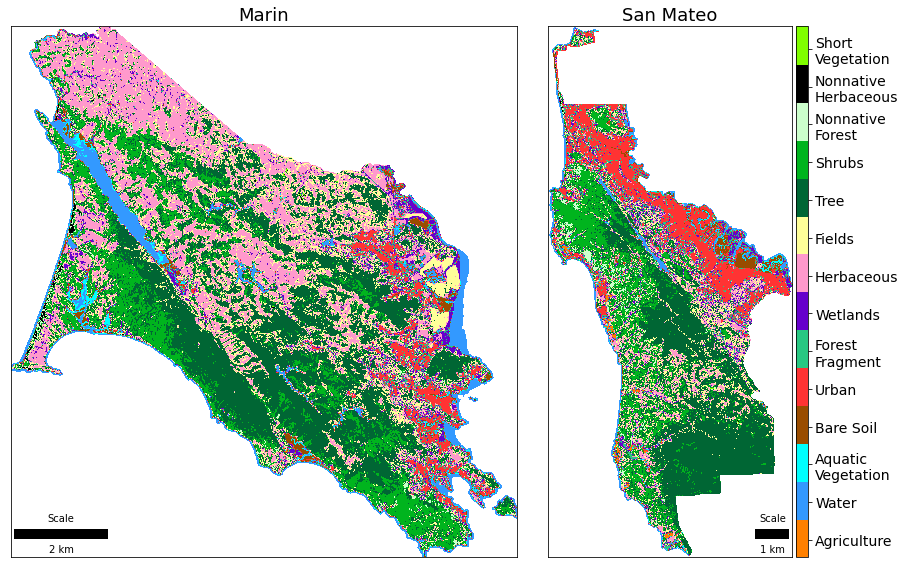

In [10]:
formatter = plt.FuncFormatter(lambda val, loc: labels[val])

fig, ax = plt.subplots(1,2, figsize=(15,8))

##### Marin Map
im1=ax[0].imshow(marin_elm, cmap=cmap, aspect='equal')
ax[0].set_title("Marin", size=18)
scalebar = ScaleBar(1, 'm', length_fraction=0.2, height_fraction=0.02, frameon=False, location='lower left', label='Scale')
ax[0].add_artist(scalebar)
ax[0].set_xticks([])
ax[0].set_yticks([])

##### San Mateo Map
im2=ax[1].imshow(sanmateo_elm, cmap=cmap, aspect='equal')
ax[1].set_title("San Mateo", size=18)
divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = fig.colorbar(im2, cax=cax, orientation='vertical', ticks=np.arange(0.5, len(labels), 0.925))
cbar.set_ticklabels([''] + _labels)
cbar.ax.tick_params(labelsize=14)
scalebar = ScaleBar(1, 'm', length_fraction=0.2, height_fraction=0.02, frameon=False, location='lower right', label='Scale')
ax[1].add_artist(scalebar)
ax[1].set_xticks([])
ax[1].set_yticks([])

fig.subplots_adjust(wspace=-0.5)

plt.tight_layout()
plt.show()

#### Figure 2. Class Proportions

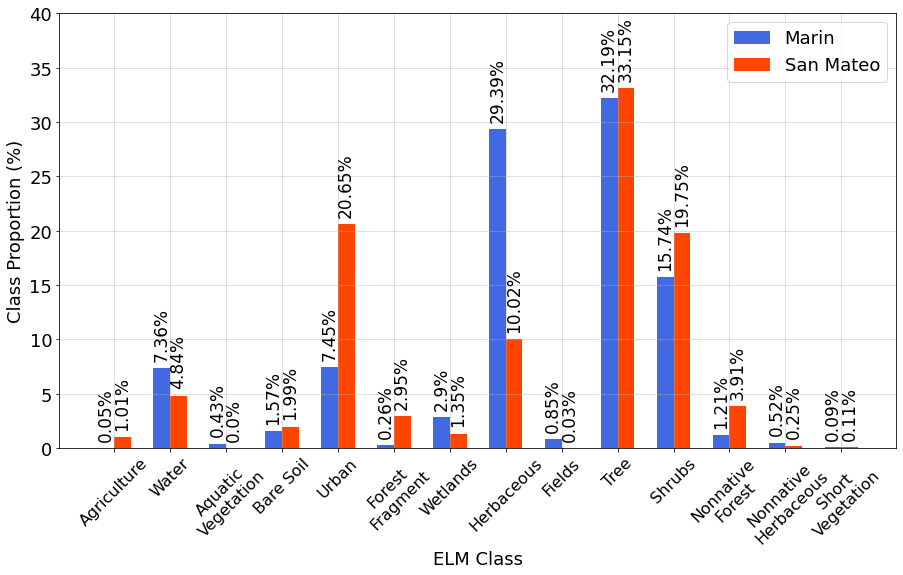

In [82]:
fig, ax = plt.subplots(1, figsize=(15,8))

# Compute class distributions
unique1, counts1 = np.unique(marin_elm[~np.isnan(marin_elm)], return_counts = True) # Marin
unique2, counts2 = np.unique(sanmateo_elm[~np.isnan(sanmateo_elm)], return_counts = True) # San Mateo
# Take relative proportions
counts1 = counts1/sum(counts1) * 100
counts2 = counts2/sum(counts2) * 100

# Visualize Plot

# Plot parameters
barwidth = 0.3 # Bar width
offset = 7 # Offset of annotated text with bars

plot1 = ax.bar(unique1 - barwidth/2, counts1, width=0.3, color='royalblue', label='Marin')
plot2 = ax.bar(unique2 + barwidth/2, counts2, width=0.3, color='orangered', label='San Mateo')

# Annotate relative proportions
for i, rect in enumerate(plot1):
    height = rect.get_height()
    ax.annotate(str(np.round(counts1[i],2)) + '%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, offset), textcoords='offset points', fontsize=17,
                ha='center', va='bottom', rotation=90)
for i, rect in enumerate(plot2):
    height = rect.get_height()
    ax.annotate(str(np.round(counts2[i],2)) + '%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, offset), textcoords='offset points',fontsize=17,
                ha='center', va='bottom', rotation=90)

ax.set_xlabel('ELM Class', size = 18)
ax.set_xticks(np.arange(0,len(labels), 1)+1)
ax.set_xticklabels(_labels, rotation=45, size=16)

ax.set_ylabel('Class Proportion (%)', size=18)
ax.set_ylim([0,40])
ax.tick_params(axis='y', labelsize=18)
ax.grid(True, alpha=0.5)

ax.legend(fontsize=18)

plt.show()

In [16]:
# Figures for table plots
import pandas as pd

model_table = pd.read_csv('igarss_table1.csv')
feature_table = pd.read_csv('igarss_table2.csv')
lossf_table = pd.read_csv('igarss_table3.csv')  

In [17]:
# model_table['model'] = model_table['Encoder'] + '-' + model_table['Decoder']

<AxesSubplot:xlabel='Datasets', ylabel='Train F1'>

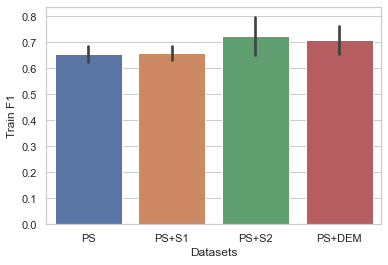

In [63]:
sns.barplot(data=feature_table, x='Datasets', y='Train F1')

In [61]:
model_table['model'][0]

'Only-UNET'